In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import matplotlib.dates as mdates
import sympy as sp
from scipy.optimize import curve_fit
import datetime as datetime
Fmt = mdates.DateFormatter('%H%M%S')
%matplotlib widget

In [2]:
loaddirectory = '..\\data\\20231102_alignment\\'
filename = 'HysteresisTest20231102_123607_120.258phi.npy'
data = np.load(loaddirectory+filename, allow_pickle = True)
newdata=np.transpose(data)
x1,x2,x3,phi,c,l, v, time = newdata

In [3]:
# 15 samples between max and min angle
#10 iterations
#newdata
len(phi)

150

In [4]:
len(time)

150

In [5]:
# iterate over the different samples
capacity = {}
angle = {}
time_time = {}

for i in range(10):
    capacity[i] = c[i*15:(i+1)*15]
    angle[i] = phi[i*15:(i+1)*15]
    time_time[i] = time[i*15:(i+1)*15]

In [6]:
#fitting function
def func(angle, A, B, angle_0):
    return A + B*(angle-angle_0)**2

initial_guess = [0, 0, 0]

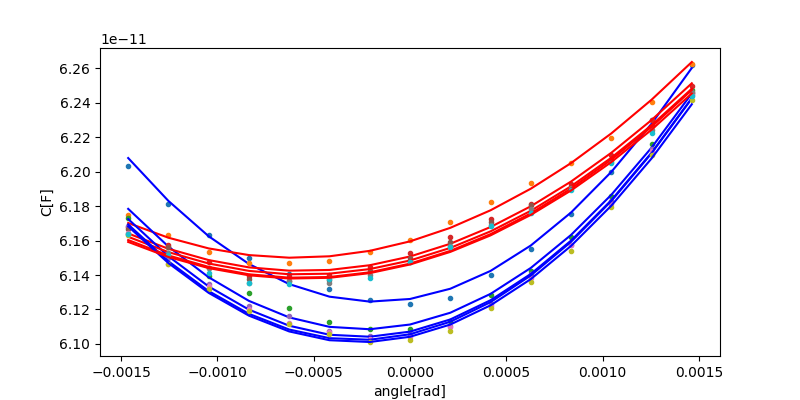

In [7]:
#for capacity to distance 7.0101299782494926e-15/(c*1e-12))*1e6
for i in range(10):
    #fit the data to the points
    parameters, covariance = curve_fit(func, angle[i], capacity[i], p0=initial_guess)

    #get fitted parameters
    A_fit, B_fit, angle_0_fit = parameters

    
    # Set the color based on 'i' being even or odd
    if i % 2 == 0:  # 'i' is even
        color = 'blue'
    else:  # 'i' is odd
        color = 'red'
    
    plt.figure(130, figsize=(8,4))
    plt.plot(angle[i], capacity[i], '.')
    plt.plot(angle[i], func(angle[i], A_fit, B_fit, angle_0_fit), color = color)
    plt.xlabel('angle[rad]')
    plt.ylabel('C[F]')
plt.show()

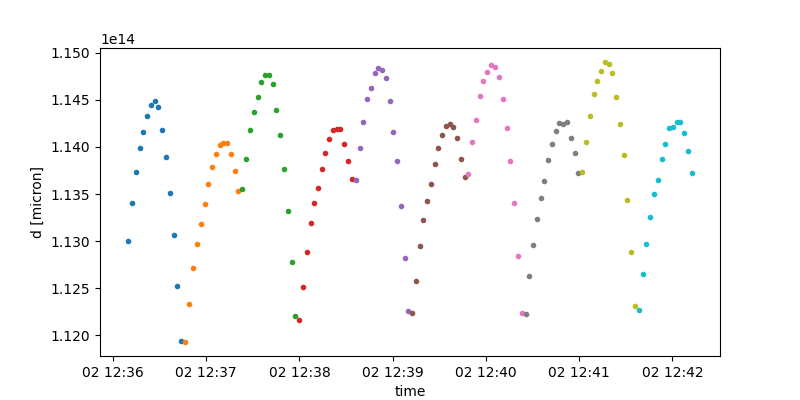

In [8]:
#for capacity to distance 7.0101299782494926e-15/(c*1e-12))*1e6
for i in range(10):
    #fit the data to the points
    parameters, covariance = curve_fit(func, angle[i], capacity[i], p0=initial_guess)

    #get fitted parameters
    A_fit, B_fit, angle_0_fit = parameters
    
#     minima.append(angle_0_fit)
    
    # Set the color based on 'i' being even or odd
    if i % 2 == 0:  # 'i' is even
        color = 'blue'
    else:  # 'i' is odd
        color = 'red'
    
    plt.figure(99, figsize=(8,4))
    plt.plot(time_time[i], (7.0101299782494926e-15/(capacity[i]*1e-12))*1e6, '.')
    #plt.plot(time_time[i], func(angle[i], A_fit, B_fit, angle_0_fit), color = color)
    plt.xlabel('time')
    plt.ylabel('d [micron]')
plt.show()


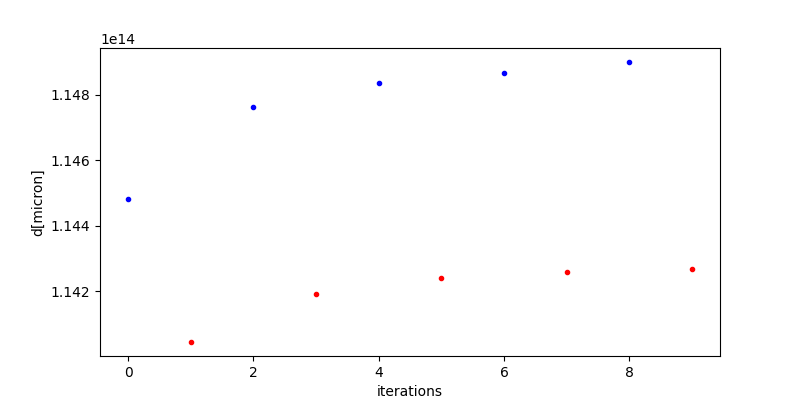

In [9]:
#get min capacitance for corresponding angle


for i in range(10):
    min_values = {}
    cmin = min(capacity[i])

    
    
    # Set the color based on 'i' being even or odd
    if i % 2 == 0:  # 'i' is even
        color = 'blue'
    else:  # 'i' is odd
        color = 'red'
    
    plt.figure(87, figsize=(8,4))
    plt.plot(i, (7.0101299782494926e-15/(cmin*1e-12))*1e6, '.', color = color)
    plt.xlabel('iterations')
    plt.ylabel('d[micron]')
plt.show()

# ((7.0101299782494926e-15/(cmin*1e-12))*1e6)
# capacity[i]


In [10]:
hysteresis = []
for i in range(9):
    hysteresis.append(min(capacity[i])-min(capacity[i+1]))

In [11]:
hysteresis

[-2.3390000000001095e-13,
 3.8399999999999836e-13,
 -3.0499999999999274e-13,
 3.440000000000042e-13,
 -3.1800000000000087e-13,
 3.3399999999999595e-13,
 -3.2400000000000064e-13,
 3.4199999999999996e-13,
 -3.379999999999915e-13]

In [12]:
hysteresis_d = [(7.0101299782494926e-15 /h) for h in hysteresis]

In [13]:
hysteresis_d

[-0.029970628380714685,
 0.018255546818358132,
 -0.022984032715572655,
 0.020378284820492462,
 -0.022044433893866268,
 0.02098841310853167,
 -0.021636203636572465,
 0.020497456076752903,
 -0.020740029521448725]

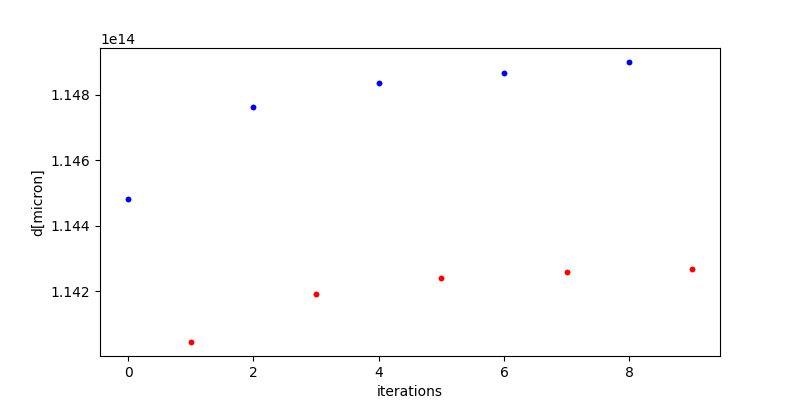

In [14]:
for i in range(10):
    min_values = {}
    cmin = min(capacity[i])
    
    
    # Set the color based on 'i' being even or odd
    if i % 2 == 0:  # 'i' is even
        color = 'blue'
    else:  # 'i' is odd
        color = 'red'
    
    plt.figure(87, figsize=(8,4))
    plt.plot(i, (7.0101299782494926e-15/(cmin*1e-12))*1e6, '.', color = color)
    plt.xlabel('iterations')
    plt.ylabel('d[micron]')
plt.show()